# Choice of Chart by Andrew Abela
<img src="Images/Chart_Choice.png"/>

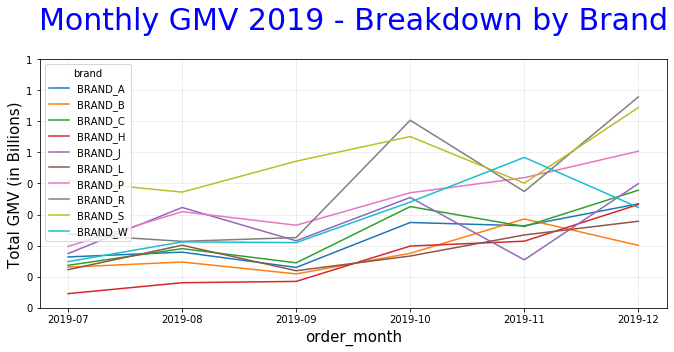

In [11]:
# Make multi-line chart
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
data['order_month'] = data['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
data['GMV'] = data['item_price'] * data['quantity']
data.groupby(['order_month','brand'])['GMV'].sum().unstack().plot()
plt.title('Monthly GMV 2019 - Breakdown by Brand',color='blue',fontsize=30,pad=30)
plt.xlabel('order_month',fontsize=15)
plt.ylabel('Total GMV (in Billions)',fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.ylim(ymin=0)
plt.grid(color='darkgray',linewidth=0.5,linestyle=':')
plt.gcf().set_size_inches(10,5) # Change the figure size
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

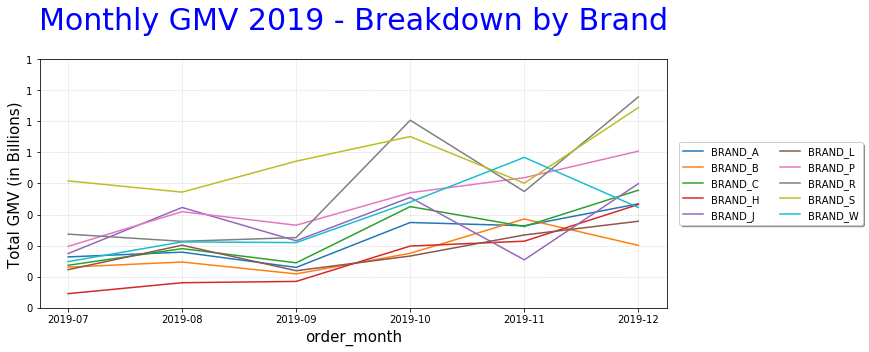

In [19]:
# Legend Customization
'''''
- The attribute Loc in legend() is used to specify the location of the legend.Default value of loc is loc=”best” (upper left).
The strings ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’ place the legend at the corresponding corner of the 
axes/figure.
- The attribute bbox_to_anchor=(x, y) of legend() function is used to specify the coordinates of the legend. 
- The attribute ncol represents the number of columns that the legend has.It’s default value is 1.
- shadow: [None or bool] Whether to draw a shadow behind the legend.It’s Default value is None.
- markerscale: [None or int or float] The relative size of legend markers compared with the originally drawn ones.The Default is None.
- numpoints: [None or int] The number of marker points in the legend when creating a legend entry for a Line2D (line).The Default is None.
- fontsize: The font size of the legend.If the value is numeric the size will be the absolute font size in points.
-  facecolor: [None or “inherit” or color] The legend’s background color.
- edgecolor: [None or “inherit” or color] The legend’s background patch edge color.
'''''
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
data['order_month'] = data['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
data['GMV'] = data['item_price'] * data['quantity']
data.groupby(['order_month','brand'])['GMV'].sum().unstack().plot()
plt.title('Monthly GMV 2019 - Breakdown by Brand',color='blue',fontsize=30,pad=30)
plt.xlabel('order_month',fontsize=15)
plt.ylabel('Total GMV (in Billions)',fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.ylim(ymin=0)
plt.grid(color='darkgray',linewidth=0.5,linestyle=':')
plt.gcf().set_size_inches(10,5) # Change the figure size
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
#
plt.legend(loc='right',shadow=True,bbox_to_anchor=(1.32,0.5),ncol=2)
#
plt.show()

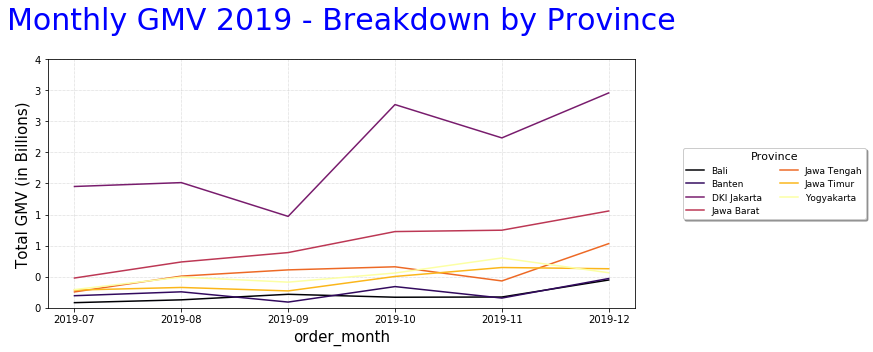

In [30]:
#Colormap customization
'''''
In visualizing the 3D plot, we need colormaps to differ and make some intuitions in 3D parameters. 
Scientifically, the human brain perceives various intuition based on the different colors they see.

Matplotlib will give you viridis as a default colormaps. Then, next are the examples of Diverging, Cyclic, 
Qualitative, and Misc colormaps in Matplotlib.
'''''
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
data['order_month'] = data['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
data['GMV'] = data['item_price'] * data['quantity']
data.groupby(['order_month','province'])['GMV'].sum().unstack().plot(cmap='inferno')
plt.title('Monthly GMV 2019 - Breakdown by Province',color='blue',fontsize=30,pad=30)
plt.xlabel('order_month',fontsize=15)
plt.ylabel('Total GMV (in Billions)',fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.ylim(ymin=0)
plt.grid(color='darkgray',linewidth=0.5,linestyle=':')
plt.gcf().set_size_inches(10,5) # Change the figure size
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.legend(loc='right',shadow=True,bbox_to_anchor=(1.4,0.5),ncol=2,title='Province',title_fontsize=11,fontsize=9)
plt.show()

More colormaps : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

      province          GMV
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


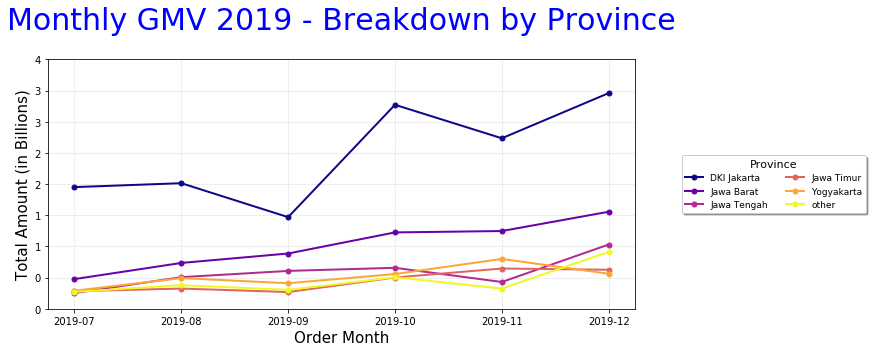

In [42]:
# Top 5 Provinces
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
data['order_month'] = data['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
data['GMV'] = data['item_price'] * data['quantity']
top_province = (data.groupby(['province'])['GMV'].
                sum().
                reset_index().
                sort_values(by='GMV',ascending=False).
                head(5)
               )
print(top_province)
data['top_province'] = data['province'].apply(lambda x: x if (x in top_province['province'].to_list())else 'other')
data.groupby(['order_month','top_province'])['GMV'].sum().unstack().plot(linewidth=2,marker='o',markersize=5,cmap='plasma')
plt.title('Monthly GMV 2019 - Breakdown by Province',color='blue',fontsize=30,pad=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.ylim(ymin=0)
plt.grid(color='darkgray',linewidth=0.5,linestyle=':')
plt.gcf().set_size_inches(10,5) # Change the figure size
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.legend(loc='right',shadow=True,bbox_to_anchor=(1.4,0.5),ncol=2,title='Province',title_fontsize=11,fontsize=9)
plt.show()

      province          GMV
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


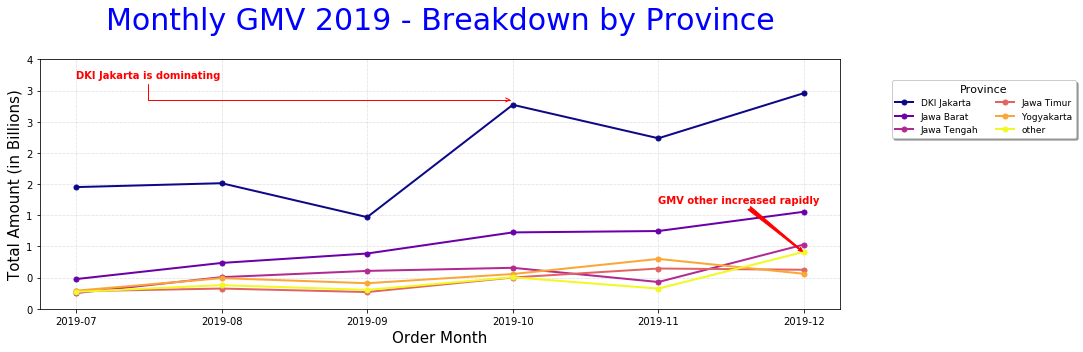

In [2]:
# Annotate Function
'''''
- The annotate() function in pyplot module of matplotlib library is used to annotate the point xy with texts.
- Syntax: angle_spectrum(x, Fs=2, Fc=0, window=mlab.window_hanning, pad_to=None, sides=’default’, **kwargs)
- Parameters: This method accept the following parameters that are described below:
s: This parameter is the text of the annotation.
xy: This parameter is the point (x, y) to annotate.
xytext: This parameter is an optional parameter. It is The position (x, y) to place the text at.
xycoords: This parameter is also an optional parameter and contains the string value.
textcoords: This parameter contains the string value.Coordinate system that xytext is given, which may be different than 
the coordinate system used for xy
arrowprops : This parameter is also an optional parameter and contains dict type.Its default value is None.Dict=
    - arrowstyle = shape of arrow ('->','-|>','<->','-[',etc.)
    - connectionstyle = shape of arrow's line (['arc','arc3']=straight line,'angle','angle3','bar')
    - color = color of the arrow
annotation_clip : This parameter is also an optional parameter and contains boolean value.Its default value is None 
which behaves as True.
'''''
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
data['order_month'] = data['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
data['GMV'] = data['item_price'] * data['quantity']
top_province = (data.groupby(['province'])['GMV'].
                sum().
                reset_index().
                sort_values(by='GMV',ascending=False).
                head(5)
               )
print(top_province)
data['top_province'] = data['province'].apply(lambda x: x if (x in top_province['province'].to_list())else 'other')
data.groupby(['order_month','top_province'])['GMV'].sum().unstack().plot(linewidth=2,marker='o',markersize=5,cmap='plasma')
plt.title('Monthly GMV 2019 - Breakdown by Province',color='blue',fontsize=30,pad=30)
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.ylim(ymin=0)
plt.grid(color='darkgray',linewidth=0.5,linestyle=':')
#First Annotation
plt.annotate('GMV other increased rapidly',xy=(5,900000000),
             xytext=(4,  1700000000),weight='bold',color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle="arc3",
                             color='red'))
# Second Annotation
plt.annotate('DKI Jakarta is dominating', xy=(3,3350000000),
             xytext=(0,3700000000), weight='bold',color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))

plt.gcf().set_size_inches(12,5) # Change the figure size
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.legend(loc='right',shadow=True,bbox_to_anchor=(1.3,0.8),ncol=2,title='Province',title_fontsize=11,fontsize=9)
plt.show()

In [3]:
# Create data subset
subset_jakarta = data[(data['province']=='DKI Jakarta') & (data['order_month'] >= '2019-10')]
subset_jakarta.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,GMV,top_province
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta


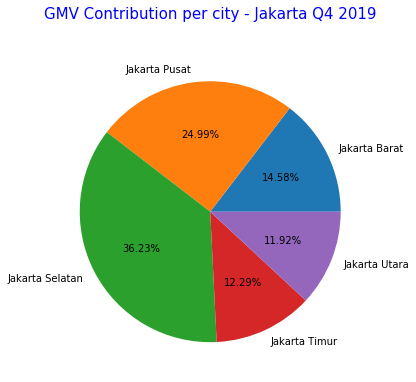

In [11]:
# Create a pie chart
'''''
plt.pie parameters :
labels = array for labelling each pie wedge
colors = add color for each pie wedge
shadow = if True the chart will shadowed and vice versa
radius = radius of chart
autopct = If not None, is a string or function used to label the wedges with their numeric value. The label will be placed 
inside the wedge. If it is a format string, the label will be fmt%pct. If it is a function, it will be called.
'''''
gmv_jakarta = subset_jakarta.groupby('city')['GMV'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_jakarta['GMV'],labels=gmv_jakarta['city'],autopct='%1.2f%%')
plt.title('GMV Contribution per city - Jakarta Q4 2019',pad=30,loc='center',color='blue',fontsize=15)
plt.show()

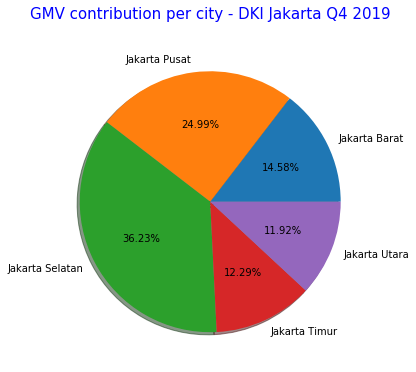

In [36]:
gmv_jakarta = subset_jakarta.groupby('city')['GMV'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_jakarta['GMV'],labels=gmv_jakarta['city'],autopct='%1.2f%%',shadow=True)
plt.title('GMV contribution per city - DKI Jakarta Q4 2019',color='blue',pad=20,fontsize=15)
plt.show()

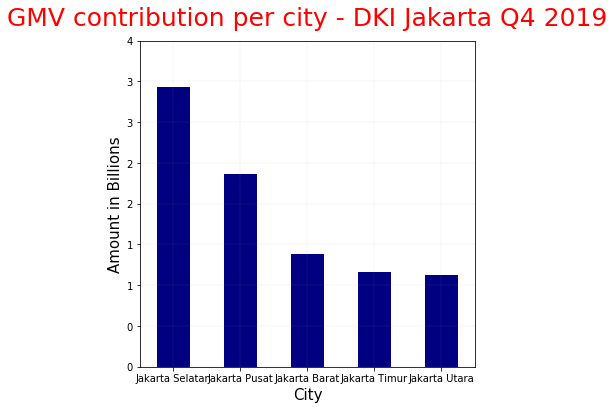

In [49]:
# Create a bar chart
plt.figure(figsize=(6,6))
#
subset_jakarta.groupby('city')['GMV'].sum().sort_values(ascending=False).plot(kind='bar',color='navy')
#
plt.title('GMV contribution per city - DKI Jakarta Q4 2019',fontsize=25,loc='center',color='red',pad=15)
plt.xlabel('City',fontsize=15)
plt.ylabel('Amount in Billions',fontsize=15)
labels, locations = plt.yticks()
plt.ylim(ymin=0)
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.grid(color='darkgray',linewidth=0.09)
plt.show()

<Figure size 720x720 with 0 Axes>

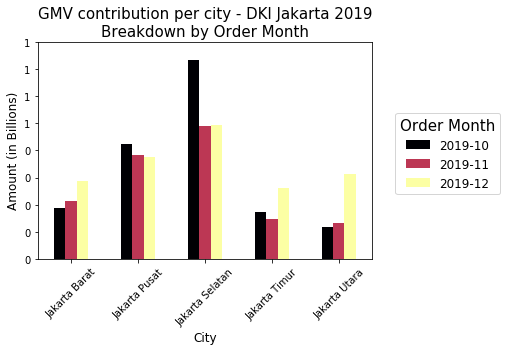

In [59]:
# Create multi bar chart
plt.figure(figsize=(10,10))
#
subset_jakarta.groupby(['city','order_month'])['GMV'].sum().unstack().plot(kind='bar',cmap='inferno')
#
plt.title('GMV contribution per city - DKI Jakarta 2019\nBreakdown by Order Month',fontsize=15)
plt.xlabel('City',fontsize=12)
plt.ylabel('Amount (in Billions)',fontsize=12)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.legend(title='Order Month',title_fontsize=15,fontsize=12,bbox_to_anchor=(1.4,0.7))
plt.show()

<Figure size 720x720 with 0 Axes>

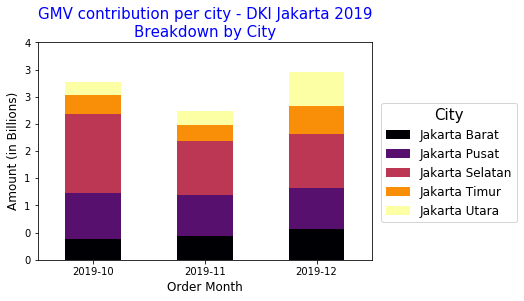

In [66]:
# Create Stacked bar chart
plt.figure(figsize=(10,10))
subset_jakarta.groupby(['order_month','city'])['GMV'].sum().sort_values(ascending=False).unstack().plot(kind='bar',cmap='inferno',stacked=True)
plt.title('GMV contribution per city - DKI Jakarta 2019\nBreakdown by City',fontsize=15,color='blue')
plt.xlabel('Order Month',fontsize=12)
plt.ylabel('Amount (in Billions)',fontsize=12)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.legend(title='City',title_fontsize=15,fontsize=12,bbox_to_anchor=(1.45,0.75))
plt.show()

In [69]:
# Create aggregated customers data
data_per_customer = subset_jakarta.groupby('customer_id').agg({
    'order_id' : 'nunique',
    'quantity' : 'sum',
    'GMV' : 'sum'
}).reset_index().rename(columns={'order_id' : 'orders'})
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        GMV
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


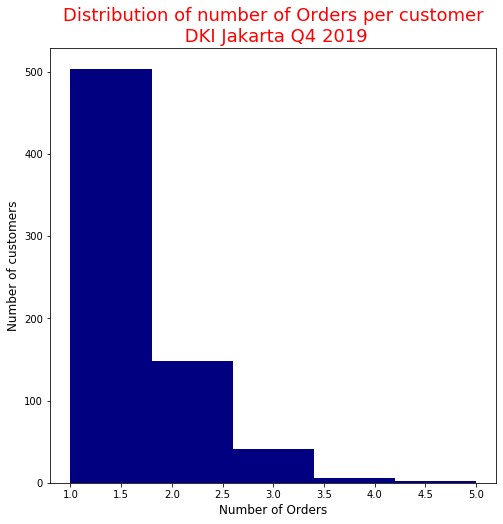

In [87]:
# Create Histogram chart
'''''
Parameter :
bins : total bins that we need
range : max and min value to show
orientation : 'horizontal' or 'vertical'
color = histogram's bar color
'''''
plt.figure(figsize=(8,8))
plt.hist(data_per_customer['orders'],range=(1,5),color='navy',bins=5)
plt.title('Distribution of number of Orders per customer\n DKI Jakarta Q4 2019',color='red',fontsize=18)
plt.xlabel('Number of Orders',fontsize=12)
plt.ylabel('Number of customers',fontsize=12)
plt.show()

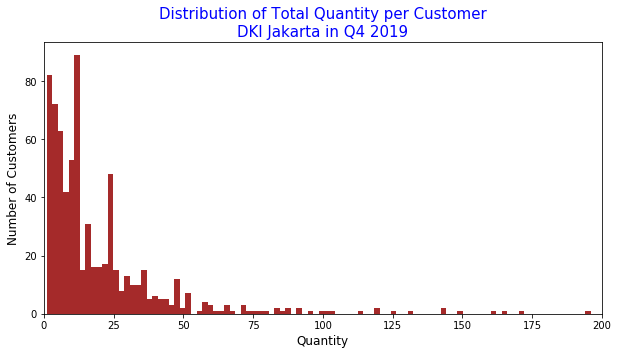

In [88]:
# Make a histogram chart part 2
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'],bins=100,range=(1,200),color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.xlim(xmin=0,xmax=200)
plt.show()

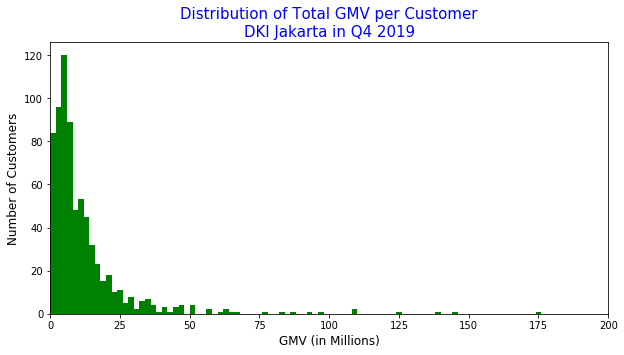

In [90]:
# Make a histogram chart part 3
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['GMV'],bins=100,range=(1,200000000),color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('GMV (in Millions)',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels,(labels/1000000).astype(int))
plt.show()

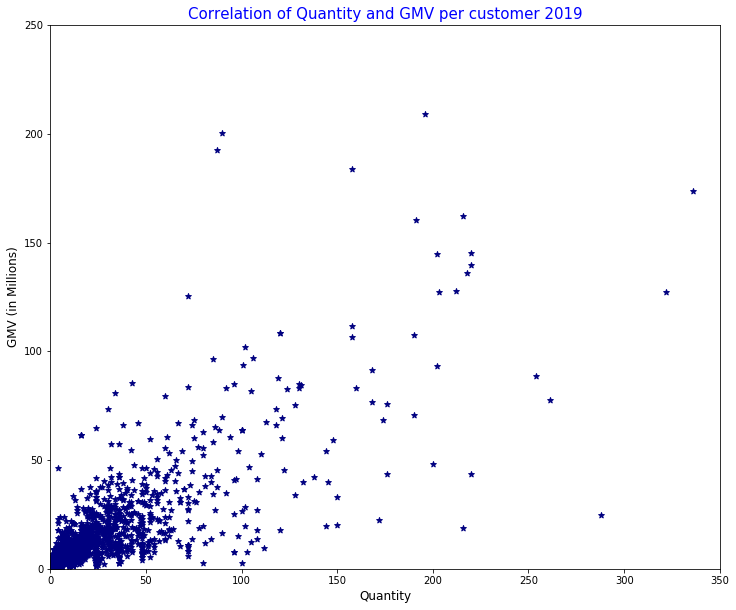

In [20]:
# Make a scatter plot
import matplotlib.pyplot as plt
import pandas as pd
import datetime
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset['GMV'] = dataset['item_price'] * dataset['quantity']
dataset['order_month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m'))
new_dataset = dataset.groupby('customer_id').agg({
    'order_id' : 'nunique',
    'quantity' : 'sum',
    'GMV' : 'sum'
}).reset_index().sort_values(by='quantity',ascending=False)
plt.figure(figsize=(12,10))
plt.scatter(new_dataset['quantity'],new_dataset['GMV'],color='navy',marker='*')
plt.title('Correlation of Quantity and GMV per customer 2019',color='blue',fontsize=15)
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('GMV (in Millions)',fontsize=12)
plt.xlim(xmin=0,xmax=350)
plt.ylim(ymin=0,ymax=250000000)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.show()

Learning Sources :
- www.dqlab.id
- www.omz-software.com
- www.geeksforgeeks.org
- www.matplotlib.org